# Lyrics generative model

Hyperparameters:
```plaintext
Hyperparameters(vocab_size=5000, n_feedforward=512, n_encoder_layer=5, n_decoder_layer=5, n_head=8, n_embd=512, dropout=0.1, bias=False, epochs=1000, batch_size=1, optimizer={'lr': 0.0001, 'betas': (0.9, 0.98), 'eps': 1e-09}, scheduler={'decay_lr': True, 'warmup': 100, 'max': 5000, 'min_lr': 0.0001}, weight_decay=0.1, grad_clip=1.0, output_path='./output/', data_path='./data/lyrics.csv', tokenizer={'path': None, 'bpe_path': './tokenization/lyrics.model', 'k': None, 'special_symbols': {'[PAD]': 256, '[CLS]': 257, '[SEP]': 258}, 'vocab_size': 5000, 'tokenizer': None}, loss_fn=CrossEntropyLoss())
```

Transformer architecture:
```plaintext
Transformer(
  (transformer): Transformer(
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-4): 5 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
          )
          (linear1): Linear(in_features=512, out_features=512, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=512, out_features=512, bias=True)
          (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
      (norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
    )
    (decoder): TransformerDecoder(
      (layers): ModuleList(
        (0-4): 5 x TransformerDecoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
          )
          (multihead_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
          )
          (linear1): Linear(in_features=512, out_features=512, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=512, out_features=512, bias=True)
          (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (norm3): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
          (dropout3): Dropout(p=0.1, inplace=False)
        )
      )
      (norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
    )
  )
  (src_tok_emb): Embedding(
    (embedding): Embedding(5000, 512)
  )
  (tgt_tok_emb): Embedding(
    (embedding): Embedding(5000, 512)
  )
  (positional_encoding): PositionalEncoding(
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (generator): Linear(in_features=512, out_features=5000, bias=True)
)
```

Vocabulary size: 5000

In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append("..")

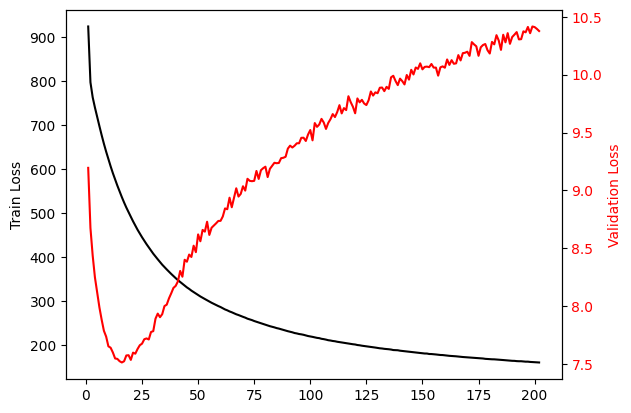

In [2]:
loss = pd.read_csv('./loss.csv', header=0, index_col=0)

fig, ax1 = plt.subplots()
ax1.plot(loss.index, loss["train_loss"], color='black')
ax1.set_ylabel('Train Loss', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(loss.index, loss["val_loss"], color='red')
ax2.set_ylabel('Validation Loss', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.xticks(range(0, max(loss.index)+1, 25))
plt.xlabel('Epoch')
plt.show()

In [3]:
models = {
    "100": torch.load("./model-100.pth", map_location=torch.device('cpu')),
    "200": torch.load("./model-200.pth", map_location=torch.device('cpu')),
}
for model in models.values():
    model.config.device = "cpu"

In [4]:
prompts = ["Hilbilly cowboy by Ulf G. Indahl",
           "Walking in the street by Kristian H. Liland",]
temperatures = [1.0]
maximum = 150
top_k = 75

In [5]:
for prompt in prompts:
    print(f"\n\033[92m Song title:\033[0m {prompt}")
    for temperature in temperatures:
        print(f"\n\033[91m Temperature:\033[0m {temperature}")
        for which, model in models.items():
            output = model(prompt, margin=maximum, temperature=temperature, top_k=top_k)
            print(f"\033[91m Epoch {which}:\n\033[0m {output} ...")


 Song title: Hilbilly cowboy by Ulf G. Indahl

 Temperature: 1.0
 Epoch 100:
 Take me to the rooftop
 rooftop
I got a new ho don't wanna see that stage
P rock the party is the cataster if a dauber
I got a lot, that's the damn wrap
But I'm that Xan, she's what I see
I got a lot here with my people standing empty
He got me lookin' at the party
And she's the type to bleed on you, don't let me walk
I don't know what to you do
And I love your body
I don't wanna talk
I ride Mercedescent in the spot

Come got me on, come on
Come on, come on, come on
 ...
 Epoch 200:
 One, one, one, one, one

Talkin' in my sleep at night, makin' myself crazy
(Ha-ha-ha-ha-ha-ha-ha, ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ha-ham try yuh man tonight drop ha-ha-ha